In [12]:
import ABCHelpers
from ABCHelpers import *

In [13]:
modelName = 'Stochastic_SymTree'

In [14]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
metrics = {
    'rule_1_0': (0.01, 1.0),
    'rule_1_1': (0.01, 1.0)
}

In [16]:
prior = Distribution(rule_1_0 = RV("uniform", 0, 1), 
                     rule_1_1 = RV("uniform", 0, 1),                  
                    )

In [17]:
abc = ABCSMC(model, prior, distance)

In [18]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [19]:
target = model({})

In [20]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=38, start_time=2019-02-24 19:12:56.261463, end_time=None)>
INFO:Epsilon:initial epsilon is 8.67595830629625


38

In [21]:
history = abc.run(minimum_epsilon=0.5, max_nr_populations=15)

INFO:ABC:t:0 eps:8.67595830629625
INFO:ABC:t:1 eps:2.486990813861891
INFO:ABC:t:2 eps:1.1314318623626143
INFO:ABC:t:3 eps:0.8869696790459822
INFO:ABC:t:4 eps:0.7705395975943525
INFO:ABC:t:5 eps:0.6355575319617364
INFO:ABC:t:6 eps:0.5469311811282194
INFO:ABC:t:7 eps:0.4649705674520513
INFO:History:Done <ABCSMC(id=38, start_time=2019-02-24 19:12:56.261463, end_time=2019-02-24 19:16:43.066850)>


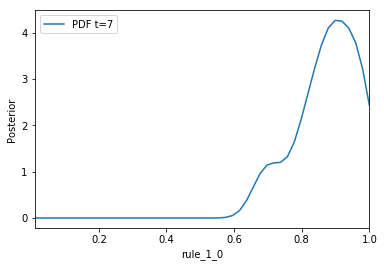

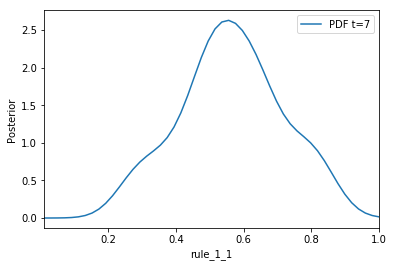

In [22]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".formdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYAAAAELCAYAAADQsFGkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzt3Xt8VPWd//HXJ3dy45IECAQIEEAQFDXgBVBRi5fWarfVtaVbq24ttra11nZ3f939abv9PXa73d3a7a9eaOul1cpaW7vWrWtBQCEIAqKoXBOuQcidcAkhl/nuHzNBxJAMyZw5yZz38/EYycycOd8PxzDvc77nnO/XnHOIiEjwJPldgIiI+EMBICISUAoAEZGAUgCIiASUAkBEJKAUACIiAaUAEBEJKAWAiEhAKQBERAIqxe8CTpafn++Ki4v9LkNEpN9Yv359rXOuoCef7VMBUFxczLp16/wuQ0Sk3zCz3T39rLqAREQCSgEgIhJQCgARkYDqU+cAOtPa2kplZSXNzc1+l9IvZGRkUFRURGpqqt+liEgf1+cDoLKykpycHIqLizEzv8vp05xz1NXVUVlZydixY/0uR0T6uD7fBdTc3ExeXp6+/KNgZuTl5eloSUSi0ucDANCX/xnQthKRaPX5LiARkb6m+nAzK7fXMjw3g6LBmRQOyiA1uV/sT3+IAiAKycnJTJs2jba2NiZPnsyTTz5JZmbmiddbW1tJSUnh1ltv5Z577iEpKYnly5dzww03nOiLz8/PZ8mSJR9a7/Lly0lLS+OSSy6Jqo5ly5bxzW9+88TzLVu2sGjRIm688cbY/WVFpEvVh5v5zMOvs6e+6cRrScaJMCgaPICrpgzjummFPlYZHQVAFAYMGMBbb70FwPz583nkkUe49957P/R6dXU1n/vc52hsbOR73/seAHPmzOHFF1887XqXL19OdnZ21AEwd+7cE+3V19dTUlLCvHnzevNXE5EzcKi5lVsfW0vtkeM8ftsMMlKSqWxoorLhWOTRxMryWn6/YR///BfTuGXmaL9L7pIC4AzNmTOHjRs3fuT1oUOHsnDhQmbMmMEDDzzQ7Xp27drFI488QnJyMk899RQ//elPmTNnTtR1PPfcc1x77bVkZmaeSfki0kPNre186cl1bK86zGNfnMGlEzuG38n70HLH29q581fr+bvn3yE9NYlPnVcU/2Kj1K8C4Ht/fI9N7x+K6TqnjMjl/uvPjmrZtrY2XnrpJa655ppO3x83bhyhUIjq6moAVqxYwfTp0wG46aab+O53v3ti2eLiYhYsWEB2djb33XcfAE8//TQ/+tGPPrLekpISnnvuuQ+9tmjRIu69996o6haR3mkPOb6xaANrdtbzk1umn/Tl/1HpKck8+lcXcNvja/nWs2+TnpLcZ7uD+lUA+OXYsWMnvsjnzJnDHXfccdplnXMnfu6uC+hU8+fPZ/78+d0ut3//ft555x2uvvrqqNctIj3jnOPv//AOL79Xxf3XT+GG6SO7/UxGajK/uLWULzz2Bl9/ZgPpKUlcOXlYHKo9M/0qAKLdU4+1k/v6u7Jjxw6Sk5MZOnQomzdvPuN2oj0CePbZZ/nUpz6lu31F4uDf/ryNZ97Yy1fnjue2WdHfYJmVnsLjt81g/s/XcNdTb/LLL5YyZ0KPRm32TL8KgL6spqaGBQsWcPfdd0d9LX5OTg6HDn3QpRXtEcAzzzzDP/3TP/W4VhGJzuNlO/n/y8q5ZcYo7ps36Yw/n5uRyq9un8lnf76aL/1qHU/eNpMLx+V1/8E46X8XrvYhHV1DZ599NldddRXz5s3j/vvvj/rz119/Pc8//zzTp09nxYoVUX1m165d7N27l8suu6ynZYtIFFaV1/K9P25i3pRh/ODGqT2+yXJwVhpP/fWFjBw0gNufWMvbew/GuNKes5P7rP1WWlrqTp0QZvPmzUyePNmnivonbTOR3rv9ibW8u6+R174zl4zU5F6v70BjM59+eBWDs1L5492zY3bXvpmtd86V9uSznh8BmFmymW0ws+jPhoqI+KiyoYllW6u5ZcaomHz5AwwfmMHXryzh3X2HWFleG5N19lY8uoC+AZz5GVEREZ8semMvBvxljG/kuvG8kQzLTefh5RUxXW9PeRoAZlYEfBz4RW/W05e6qfo6bSuR3mltD7Fo7V7mThrKyEEDYrru9JRk/nr2OFZV1PFWHzgX4PURwIPAd4BQT1eQkZFBXV2dvtii0DEfQEZGht+liPRbizdVUXvkOPMv8mYYh89eOJrcjBQe6QNHAZ5dBmpmnwCqnXPrzezyLpa7E7gTYPToj27woqIiKisrqamp8arUhNIxI5iI9MzTa3YzctAALps41JP1Z6en8IWLi/nZ8nIqao4wviDbk3ai4eV9ALOAT5rZdUAGkGtmTznnPn/yQs65hcBCCF8FdOpKUlNTNbuViMTFztqjlJXXcd+8iSQneTe3xhdnFfPzFTtY+OoOfviZczxrpzuedQE55/7OOVfknCsGbgGWnvrlLyLSlzzzxh5SkoybS0d52k5+djp/OWMUv99QyYFG/2bw041gIiKER/v87bq9zDt7GENzvT+P9qU54wg5+OXKHZ63dTpxCQDn3HLn3Cfi0ZaISE/8z7sHaGhqZf6FY+LS3qghmVx/TiG/WbOHg00tcWnzVDoCEBEhfPJ3bH4WF8dxrJ4Fl4/naEs7v359d9zaPJkCQEQCb+uBw6zd1cDnZo4mycOTv6c6a3guV5w1lMdX7eJYS3vc2u2gABCRwPvNmt2kJSfx6Qvifwn1gsvGU3+0hd+u3xv3thUAIhJoTS1t/P7NfVw3bThDstLi3v6M4sFcMGYwj766g9b2Ht8z2yMKABEJtD++/T6Hj7cx/6L4nPw9lZlx12Xj2XfwGC+9eyCubSsARCTQfrNmDxOHZVM6ZrBvNVxx1lAKctJ5ZXNVXNtVAIhIYG05cIi3Kxv53MzRMRufvyeSkozZJfmUldcSCsVv3DMFgIgE1pJN4T3uj58zwudKYFZJPrVHWthadThubSoARCSwlm6p5tyigRTkpPtdCrNKwvcflMVxshgFgIgEUv3RFjbsPcjcs7wZ9fNMFQ4cwPiCrLjOFqYAEJFAenVbNc6FT8D2FbNL8lmzo56WtvhcDqoAEJFAWrqlhvzsdKaOGOh3KSfMKsnnWGs7b+5piEt7CgARCZy29hCvbq1m7qSCuA790J2LxueRnGRxOw+gABCRwFm/u4FDzW19qvsHIDcjlXOLBsbtPIACQEQCZ+nWalKTjdkT8v0u5SNml+Tz9t6DHGpu9bwtBYCIBM6yLdXMKB5CTkaq36V8xKySfEIOVlfUed6WAkBEAqWyoYltVUf6XPdPh/NGD2ZAanJczgMoAEQkUJZtqQboM9f/nyotJYkLxw1hhQJARCS2lm6pZkxeJuPys/wu5bRml+Szo+Yo7x885mk7CgARCYxjLe2sqqjjirOG+jr4W3c6Tk573Q2kABCRwHh9Ry3H20J9tv+/w6RhOeRnpykARERiZemWajLTkpk5dojfpXTJzJhVks/K8jqc8254aAWAiASCc46lm6uZXZJPekqy3+V0Kzw89HG2VR3xrA0FgIgEwtaqw7zf2Nznu386zCoJnwdYsb3GszYUACISCEv7+OWfpxo5aADj8rM8PQ+gABCRQFi2pZqzR+QyLDfD71KiNqsknzU7vRseWgEgIgnvYFML63c39Jvunw6zJ+TT1NLOW3sPerJ+BYCIJLxXt9UQcv2n+6fDRePySDI8Gx1UASAiCW/ZlmqGZKVxbtEgv0s5IwMHpHJO0SDPzgMoAEQkobWHHK9uq+HyiQUk96HJX6I1uySftzwaHloBICIJ7d19jTQ0tXLZpAK/S+mRS0ryaA851u2qj/m6FQAiktDKKsLdJ5eM73uTv0Rj2sjwnMWb3j8U83UrAEQkoZWV13LW8BwKctL9LqVHcjJSGZOXyab9CgARkag1t7azdlfDibtq+6vJw3PZvP9wzNerABCRhLV+dwMtbSFmleT5XUqvTBmRy666oxw53hbT9SoARCRhlZXXkpJkzBzbvwNgcmEuzsHWA7HtBlIAiEjCKiuvZfqoQWSnp/hdSq9MGZELwKYYdwN5FgBmlmFmb5jZ22b2npl9z6u2RERO1djUyjv7Gvt9/z/AiIEZDByQGvMrgbyMxePAFc65I2aWCqw0s5ecc6s9bFNEBIDXd9QRciREAJgZkwtz2BzjK4E8OwJwYR0zGaRGHt5NbSMicpJVFbVkpiUzfVT/Gv7hdKYUDmTLgUO0h2L3NerpOQAzSzazt4BqYLFzbo2X7YmIdFhZXsvMsUNIS0mMU52TC3Nobg2xs/ZozNbp6ZZxzrU756YDRcBMM5t66jJmdqeZrTOzdTU13s18IyLBsb/xGDtqjjI7Abp/OnScCI5lN1BcotE5dxBYDlzTyXsLnXOlzrnSgoL+OVaHiPQtZeV1QP8d/qEzE4bmkJpsMb0j2MurgArMbFDk5wHAVcAWr9oTEemwqryWvKw0zhqe43cpMZOWksT4guyYXgnk5VVAhcCTZpZMOGiedc696GF7IiI451hZXsvF4/NI6ofDP3dlyohcVm6P3dwAngWAc24jcJ5X6xcR6UxFzRGqDx9PqP7/DlMKc/n9m/uoPXKc/OzeD26XGKfHRUQiOvaQE+H6/1NNKYztiWAFgIgklLKKOkYPyWTUkEy/S4m5yZEAiNV5AAWAiCSMtvYQqyvq+v3on6czOCuNwoEZMbsSSAEgIgnjnX2NHD7elpDdPx2mFOaqC0hE5FRl5eH+/4vHJeYRAISvBKqoOUpza3uv16UAEJGEUVZex5TCXPJicIVMXzW5MJf2kGNbVe+HhlYAiEhCONbSzvrdDQnb/98hllcCKQBEJCGs211PS3soofv/AUYPySQrLTkmVwIpAEQkIawsryU12Zg5dojfpXgqKck4qzA2k8QrAEQkIawqr+O80YPJTOvf0z9GY0phLpv2HyLUy7kBFAAi0u8dbGrh3fcbmZVAo392ZXJhLkeOt1HZcKxX61EAiEi/93pFHc7B7AmJfQK4wweTxPfuPIACQET6vZXltWSnp3BOUWJM/9idScNySDIFgIgIZeW1XDh2CKnJwfhKG5CWzNj8rF5fCRSMrSUiCauyoYlddU0Jf/nnqaaMGNjrewG6DQAzSzKzm3vVioiIR1ZFpn8MXAAU5rLvoMcngZ1zIeDuXrUiIuKRsopa8rPTmTgs2+9S4mpyYe+nu4y2C2ixmd1nZqPMbEjHo9eti4j0gnOOsvI6ZpfkYZZY0z92p+NKoN6I9o6J2yN/fvWk1xwwrtcViIj00LaqI9QeOc4lAev+ARiak0F+dhq7e7GOqALAOTe2F22IiHhiZXniTv8YjcmFuazvxeejCgAzSwXuAi6NvLQceNQ519qLtkVEemVVeS1j87MYOWiA36X4orfdQNGeA3gYuAB4KPK4IPKaiIgvWttDrN6RuNM/RqNjaOieivYcwAzn3LknPV9qZm/3qmURkV54e+9Bjra0B2b8n85cffbwXn0+2iOAdjMb3/HEzMYBvZ+PTESkh8rK6zCDi8cH9wggIzW5V5+P9gjg28AyM9sBGDAGuK1XLYuI9EJZeS1TRwxkUGaa36X0W9FeBfSKmU0AJhEOgC3OueOeViYichpHj7exYW8Dd8zWlei90WUAmNkVzrmlZvYXp7w13sxwzv3ew9pERDr1xq56WtsdswN6+WesdHcEcBmwFLi+k/ccoAAQkbhbVV5LWkoSpcWD/S6lX+syAJxz95tZEvCSc+7ZONUkItKlleV1lI4Z3OuToEGnweBEpF+pO3KczfsPBfbu31jSYHAi0q+sqgjm8M9e0GBwItKvlJXXkpORwrSRA/0upd/TYHAi0q+UVdRy8bg8kpOCNfyzF6LqAjKzTDP7ezNbGHk+wcw+4W1pIiIftqeuib31x9T9EyPRngN4HGgBLok8rwR+4ElFIiKnUVYR7OGfYy3aABjvnPsXoBXAOXeM8B3BIiJxs3J7LcNy0xlfkOV3KQkh2gBoMbMBhE/8EhkYTkNBiEjctLSFeG1bDXMnDQ3c9I9eifYqoAeA/wFGmdnTwCw0GJyIxNEbO+s5fLyNqyYP87uUhBHtVUB/NrP1wEWEu36+4Zyr7eozZjYK+BUwHAgBC51zP+llvSISUEs2V5GRmqT+/xiKdkrIV5xzVwL/3clrp9MGfMs596aZ5QDrzWyxc25T70oWkaBxzrF4UxWzSwoYkKbhH2Kly3MAZpYRueM338wGn3QXcDEwoqvPOuf2O+fejPx8GNgMjIxN2SISJJv3H2bfwWN8bMpQv0tJKN0dAXwZuIfwl/16Prjy5xDws2gbiQTGecCaTt67E7gTYPTo0dGuUkQCZMnmKszgirPU/x9L3Y0G+hPgJ2b2NefcT3vSgJllA78D7nHOHeqkjYXAQoDS0lLXkzZEJLEt2VzFeaMGUZCT7ncpCSXay0APRPrxidwR/HszO7+7D5lZKuEv/6c1eYyI9MSBxmY2VjZy1RTt/cdatAHwD865w2Y2G7gaeBJ4uKsPWPhC3V8Cm51z/967MkUkqF7ZUgXAx3T5Z8xFGwDtkT8/DjzsnPsvoLuZmGcBfwVcYWZvRR7X9bBOEQmoJZuqGJOXScnQbL9LSTjR3gi2z8weBa4Cfmhm6XQTHs65lWi4CBHphaPH2yirqOOvLhqju389EO0RwM3Ay8A1zrmDwBDg255VJSICrNheS0tbSHf/eiSqAHDONQEVwNVmdjcw1Dn3Z08rE5HAW7ypioEDUjX5u0einQ/gG8DTwNDI4ykz+5qXhYlIsLWHHEu3VDF3UgGpydF2VsiZiPYcwB3Ahc65owBm9kPgdaBH9waIiHTnzT0NNDS18rEpw/0uJWFFG6vGB1cCEflZZ2RExDNLNlWRmmxcOlGDv3kl2iOAx4E1ZvZ85PmNhK/xFxHxxOLNVVw0Lo+cjFS/S0lY0Q4H/e9mthyYTXjP/zbn3AYvCxOR4KqoOcKOmqN88ZJiv0tJaF0GgJllAAuAEuAd4CHnXFs8ChOR4Hplc/ju3yt1+aenujsH8CRQSvjL/1rgXz2vSEQCb8mmaqYU5jJy0AC/S0lo3XUBTXHOTQMws18Cb3hfkogEWf3RFtbtrufuKyb4XUrC6+4IoLXjB3X9iEg8LN1STchp8Ld46O4I4Fwz6xjD34ABkecGOOdcrqfViUigOOd4es1uRg/JZOpIfb14rbsJYTT5pojEzRs769mw5yD/eONUDf4WB7q/WkT6jIdfrSA/O42bLijyu5RAUACISJ+w6f1DLN9aw22zxpKRqs6HeFAAiEif8MirFWSnp/D5i8b4XUpgKABExHd76pp4ceP7zL9wNAMHaOiHeFEAiIjvFq6oICUpidtnj/W7lEBRAIiIr2oOH+fZdZV8+oKRDMvN8LucQFEAiIivHi/bSWt7iC/NGed3KYGjABAR3xxubuXXq3dz7dThjCvI9rucwFEAiIhvfrNmD4eb21hw2Xi/SwkkBYCI+KK5tZ1frNzJ7JJ8zika5Hc5gaQAEBFfPL9hHzWHj3PX5dr794sCQETirj3kePTVCs4pGsgl4/P8LiewFAAiElehkONf/7yVXXVN3HXZeA365qNoJ4UXEem1o8fbuPfZt3j5vSpuuqCIq88e7ndJgaYAEJG42FvfxJd+tY5tVYf5h09M4fZZxdr795kCQEQ8t6qilq8+/SYhB0/ePpM5Ewr8LklQAIiIh5xzPLV6Nw/8cRNj87P4xRdKKc7P8rssiVAAiEhMtIccB5taqD/aQu2R8J/Ltlbz3PpKrjxrKA/eMp2cDI302ZcoAESkRypqjvCnjftZsrmKyoZjNDS1EHIfXe4rl4/nW/MmkZyk/v6+RgEgIlErrz7Mf288wJ/e2c/WqsMAnD96EFdPHU5eVhp5WWkMyU4nPyuNIdlpDMvJYHBWms9Vy+koAESkW79Zs4cnVu1kW9URzKB0zGDuv34K10wdTuHAAX6XJz2kABCRLv1hwz7+z/PvcO6oQTxw/RSunVaocfsThAJARE7rncpG/uZ3G5k5dghP//WFpCZr8IBEov+bItKp2iPH+fKv15GXlcZD88/Xl38C8uz/qJk9ZmbVZvauV22IiDda2kJ85ak3qW9qYeEXSsnPTve7JPGAl5H+BHCNh+sXEY98/8X3eGNXPT/89DlMHTnQ73LEI54FgHPuNaDeq/WLiDeeeWMPT63ew5cvHccN00f6XY54SJ16InLCul31/N//epdLJxbwnWvO8rsc8ZjvAWBmd5rZOjNbV1NT43c5IoG1v/EYC556k5GDBvDTW87TnbsB4HsAOOcWOudKnXOlBQUaIVDEL995biPHWtpY+IVSBmZqzJ4g8D0ARMR/a3fVs2J7LfdcNZGJw3L8LkfixMvLQJ8BXgcmmVmlmd3hVVsi0js/XryN/Ox0Pn/RGL9LkTjy7E5g59xnvVq3iMTOmh11rKqo4+8/PpkBacl+lyNxpC4gkYB7cMl2CnK09x9ECgCRAFu9o47Xd9Sx4LLxZKRq7z9oFAAiAfbjxdsYmpPO/AtH+12K+EABIBJQqypqWbOznrsu195/UCkARALIOceDi7czLDedz87U3n9QKQBEAuj1ijre2FXPVy4v0d5/gCkARALGOcePl2xjeG4GfzljlN/liI8UACIBU1Zex9pdDXxlrvr+g04BIBIgHXv/hQO19y8KAJFAWVley/rdDXxlbgnpKdr7DzoFgEhAOOd4cMl2RgzM4ObSIr/LkT5AASASENr7l1MpAEQC4OS9/5u09y8RCgCRANDev3RGASCS4LT3L6ejABBJcNr7l9NRAIgksI69/0Lt/UsnFAAiCaysvE57/3JaCgCRBBXe+w/f9avr/qUzCgCRBFVWXsc67f1LFxQAIglIe/8SDQWASAI6sfd/+Xjt/ctpKQBEEkzH3v/w3Axu1oif0gUFgEiCWba1mnW7G/jqXO39S9cUACIJpP5oC3/zu3coGZqtvX/pVorfBYhIbDjn+JvfbaSxqZUnbpuhvX/plo4ARBLEorV7Wbypim9fPYmzRwz0uxzpBxQAIglgR80Rvv/HTcwqyeOO2WP9Lkf6CQWASD/X2h7inv98i/TUJP7tpukkJZnfJUk/oXMAIv3cg0u2sbGykYfnn8/wgRl+lyP9iI4ARPqxNTvqeGh5BTeXFnHttEK/y5F+RgEg0k81Hmvl3mffZsyQTO6//my/y5F+SF1AIv2Qc45/+MO7HDjUzHMLLiYrXf+U5czpCECknznU3MrXF73FC2+/zzeunMB5owf7XZL0U9ptEOlH1u9u4BuLNrC/sZn75k3kK5eX+F2S9GMKAJF+oD3keGhZOQ++Ep7e8dkvX8wFY7TnL72jABDp4/Y3HuOeRW+xZmc9nzx3BD/41FRyM1L9LksSgKcBYGbXAD8BkoFfOOf+2cv2RBJJc2s7L793gPtfeI+WthD/etO5fPr8kZjpRi+JDc8CwMySgZ8BHwMqgbVm9oJzbpNXbYr0Z845yquP8Nr2Wl7bVsOanXU0t4aYNnIg//HZ8xibn+V3iZJgvDwCmAmUO+d2AJjZIuAGQAEggRUKORqPtVLf1ELD0Rbqj7ZQd7SFDXsaWLG9lv2NzQCMK8jilhmjmTMhn0snFpCarAv2JPa8DICRwN6TnlcCF3b1gZ21R/ncz1d7WJJIdJzr4j3cifdd5D8u/BMhB20hR1t7iPaQozXyZ1vI0dTSzsGmFkKdrDs3I4XZE/L5+oQC5kzIp2hwZsz/TiKn8jIAOuuo/MivvpndCdwJkFU4ntb2kIcliUTPOv0VPvEmRuSRBEYSZmAGKUlJpCQZKclGSlISyZGfB6Qmk5eVxuCsNIZkpTE4M/JnVhrDctJJ0V6+xJmXAVAJnDwlURHw/qkLOecWAgsBSktL3W8XXOJhSSIi0sHLXY61wAQzG2tmacAtwAseticiImfAsyMA51ybmd0NvEz4MtDHnHPvedWeiIicGU/vA3DO/Qn4k5dtiIhIz+isk4hIQCkAREQCSgEgIhJQCgARkYBSAIiIBJS5ru55jzMzqwF2+12Hj/KBWr+L6CO0LT5M2+PDtD0+MMk5l9OTD/ap+QCccwV+1+AnM1vnnCv1u46+QNviw7Q9Pkzb4wNmtq6nn1UXkIhIQCkAREQCSgHQtyz0u4A+RNviw7Q9Pkzb4wM93hZ96iSwiIjEj44AREQCSgHgAzO7xsy2mlm5mf1tJ+/fa2abzGyjmb1iZmP8qDMeutsWJy33GTNzZpbQV35Esz3M7ObI78d7ZvabeNcYL1H8OxltZsvMbEPk38p1ftQZL2b2mJlVm9m7p3nfzOw/Ittro5md3+1KnXN6xPFBeGjsCmAckAa8DUw5ZZm5QGbk57uA//S7br+2RWS5HOA1YDVQ6nfdPv9uTAA2AIMjz4f6XbeP22IhcFfk5ynALr/r9nibXAqcD7x7mvevA14iPFHdRcCa7tapI4D4mwmUO+d2OOdagEXADScv4Jxb5pxrijxdTXg2tUTU7baI+EfgX4DmeBbng2i2x5eAnznnGgCcc9VxrjFeotkWDsiN/DyQTmYcTCTOudeA+i4WuQH4lQtbDQwys8Ku1qkAiL+RwN6TnldGXjudOwineiLqdluY2XnAKOfci/EszCfR/G5MBCaaWZmZrTaza+JWXXxFsy0eAD5vZpWE5x35WnxK67PO9Lulb90JHBCdzTTe6aVYZvZ5oBS4zNOK/NPltjCzJODHwBfjVZDPovndSCHcDXQ54SPDFWY21Tl30OPa4i2abfFZ4Ann3L+Z2cXAryPbIuR9eX1S1N8tHXQEEH+VwKiTnhfRyaGrmV0FfBf4pHPueJxqi7futkUOMBVYbma7CPdrvpDAJ4Kj+d2oBP7LOdfqnNsJbCUcCIkmmm1xB/AsgHPudSCD8BhBQRXVd8vJFADxtxaYYGZjzSwNuAV44eQFIt0ejxL+8k/UPl7oZls45xqdc/nOuWLnXDHh8yGfdM71eOyTPq7b3w3gD4QvEsDM8gl3Ce2Ia5XxEc222ANcCWBmkwkHQE1cq+xbXgAgaWCdAAACVUlEQVS+ELka6CKg0Tm3v6sPqAsozpxzbWZ2N/Ay4SsdHnPOvWdm3wfWOedeAH4EZAO/NTOAPc65T/pWtEei3BaBEeX2eBmYZ2abgHbg2865Ov+q9kaU2+JbwM/N7JuEuzq+6CKXwyQiM3uGcNdffuS8x/1AKoBz7hHC50GuA8qBJuC2bteZwNtLRES6oC4gEZGAUgCIiASUAkBEJKAUACIiAaUAEBEJKAWAiEhAKQAk0MzsATO7rwefu9TM3jSzNjP7TBTL32pm2yOPW3tWrUhs6UYwSXgWvpvOYjxGzB7CYxR1Gx5mNoTwTTulhG9YWm9mL3SM6CniFx0BSEIys2Iz22xmDwFvEr5rtuO9z5jZE518ZryZ/Y+ZrTezFWZ21unW75zb5ZzbCEQTKlcDi51z9ZEv/cVAoo7iKf2IAkAS2STC46OfBxyNYvmFwNeccxcQ3rN/KEZ1nPEwvSLxoC4gSWS7IxNjdMvMsoFL+GD8JYD0GNVxxsP0isSDAkAS2cl7/Sd/4WZ0smwScNA5N92DOioJD+LVoQhY7kE7ImdEXUASFFVmNjkyycynTn3TOXcI2GlmN8GJCbbPjVHbHSN4DjazwcC8yGsivlIASFD8LfAisBQ43Rjp84E7zOxt4D06n58YADObERmS9ybgUTN773TLOufqCc9rvDby+H7kNRFfaThoEZGA0hGAiEhA6SSwSBfM7LuEu3lO9lvn3P/rZNlpwK9Pefm4c+5Cr+oT6Q11AYmIBJS6gEREAkoBICISUAoAEZGAUgCIiASUAkBEJKD+FzNsphT+FexzAAAAAElFTkSuQmCCat(t))
    ax.legend();